In [170]:
## Importing the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

from sklearn import model_selection,metrics

from sklearn.model_selection import cross_val_score,train_test_split

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df_train=pd.read_csv('Train_dataset.csv')

In [173]:
test_Data=pd.read_csv('Test_dataset.csv')

In [174]:
test_Data.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


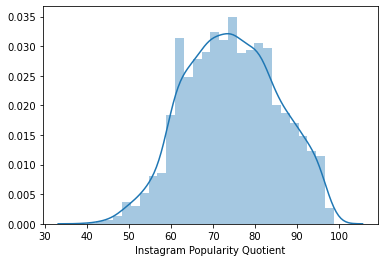

In [175]:
sns.distplot(df_train['Instagram Popularity Quotient'])

In [176]:
df_train = pd.read_csv('Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [177]:
## Checking for the null values

df_train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

In [178]:
df_train.shape

(3493, 34)

In [179]:
test_Data.shape

(500, 33)

In [180]:
test_Data.isna().sum()

Registration Number                0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endoresed By                       0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         34
Live Music Rating                102
Comedy Gigs Rating               370
Value Deals Rating               385
L

In [181]:
len(df_train['Registration Number'].unique())

3493

In [182]:
df_train.drop('Registration Number',axis=1,inplace=True)

In [183]:
reg_no_test=test_Data[['Registration Number']]
test_Data.drop('Registration Number',axis=1,inplace=True)

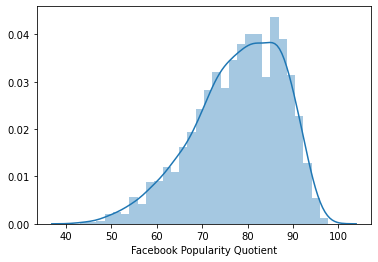

In [184]:
sns.distplot(df_train['Facebook Popularity Quotient'])

In [185]:
df_train[['cuisine1','cuisine2']]=df_train['Cuisine']. str. split(",", n = 1, expand = True)


In [186]:
df_train['cuisine1'].unique()

array(['indian', 'tibetan', 'turkish', 'irish', 'chinese', 'algerian',
       'welsh', 'peruvian', 'japanese', 'british', 'nigerian', 'polish',
       'cuban', 'swedish', 'hawaiian'], dtype=object)

In [187]:
df_train['cuisine2'].unique()

array(['irish', 'italian', 'nigerian', 'belgian', 'greek', 'salvadorian',
       'thai', 'cuban', 'japanese', 'cajun', 'algerian', 'jewish',
       'british', 'korean', 'sapnish', 'latvian'], dtype=object)

In [188]:
df_train['cuisine1'].value_counts()

tibetan     964
turkish     372
welsh       345
british     311
algerian    305
indian      273
japanese    204
chinese     159
polish      117
peruvian    115
swedish      92
irish        85
cuban        81
hawaiian     46
nigerian     24
Name: cuisine1, dtype: int64

In [189]:
df_train['cuisine2'].value_counts()

greek          778
thai           549
belgian        280
italian        278
irish          273
japanese       271
nigerian       225
salvadorian    159
sapnish        147
jewish         117
cuban          115
korean          83
british         81
algerian        67
latvian         46
cajun           24
Name: cuisine2, dtype: int64

In [190]:
df_train['City'].value_counts()

Bangalore    553
-1           396
Noida        324
Hyderabad    295
Pune         262
            ... 
Surat          1
sonepat        1
Jagdalpur      1
Jhansi         1
Hospete        1
Name: City, Length: 297, dtype: int64

In [191]:
df_train['Restaurant Location'].unique()

array(['Near Business Hub', 'Near Party Hub'], dtype=object)

In [192]:
df_train.head()

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy,cuisine1,cuisine2
0,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,...,NaN,NaN,NaN,8.0,8,6,6,6,indian,irish
1,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,...,4.0,NaN,NaN,5.0,7,7,3,8,indian,irish
2,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,...,NaN,NaN,NaN,7.0,10,5,2,8,tibetan,italian
3,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,...,NaN,NaN,NaN,7.0,7,4,3,5,turkish,nigerian
4,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,...,2.0,NaN,NaN,NaN,6,2,4,6,irish,belgian


In [193]:
test_Data[['cuisine1','cuisine2']]=test_Data['Cuisine']. str. split(",", n = 1, expand = True)


In [194]:
test_Data['cuisine1'].unique()

array(['tibetan', 'algerian', 'cuban', 'japanese', 'welsh', 'british',
       'irish', 'peruvian', 'indian', 'chinese', 'turkish', 'hawaiian',
       'polish', 'swedish', 'nigerian'], dtype=object)

In [195]:
test_Data['cuisine2'].unique()

array(['italian', 'belgian', 'greek', 'british', 'thai', 'japanese',
       'cuban', 'korean', 'irish', 'salvadorian', 'sapnish', 'algerian',
       'latvian', 'jewish', 'nigerian', 'cajun'], dtype=object)

In [196]:
df_train['Live Sports Rating'].unique()

array([nan,  4.,  3.,  2.,  5.,  6.])

In [197]:
df_train['Comedy Gigs Rating'].unique()

array([nan,  4.,  2.,  3.,  1.,  5.,  6.])

In [198]:
df_train['Value Deals Rating'].unique()

array([nan,  4.,  3.,  5.,  2.,  1.,  6.,  7.])

In [199]:
# dropping above 3 columns since 90 percent of the data is missing
df_train.drop(['Live Sports Rating','Comedy Gigs Rating','Value Deals Rating'],axis=1,inplace=True)

In [200]:
# dropping above 3 columns since 90 percent of the data is missing
test_Data.drop(['Live Sports Rating','Comedy Gigs Rating','Value Deals Rating'],axis=1,inplace=True)

In [32]:
len(df_train['City'].unique())

297

In [33]:
len(df_train['Restaurant Location'].unique())

2

In [201]:
len(df_train['Opening Day of Restaurant'].unique())

1778

In [202]:
df_train['Opening Day of Restaurant'].unique()

array(['14-02-2009', '29-09-2008', '30-07-2011', ..., '07-06-2007',
       '27-06-2013', '15-03-2007'], dtype=object)

In [203]:
#converting it into date time
df_train['Opening Day of Restaurant']=pd.to_datetime(df_train['Opening Day of Restaurant'])
df_train['day']=df_train['Opening Day of Restaurant'].dt.day
df_train['years_old']=2021-df_train['Opening Day of Restaurant'].dt.year
df_train['opening_month']=df_train['Opening Day of Restaurant'].dt.month


In [204]:
df_train.drop('Opening Day of Restaurant',axis=1,inplace=True)

In [205]:
#converting it into date time
test_Data['Opening Day of Restaurant']=pd.to_datetime(test_Data['Opening Day of Restaurant'])
test_Data['day']=test_Data['Opening Day of Restaurant'].dt.day

test_Data['years_old']=2021-test_Data['Opening Day of Restaurant'].dt.year
test_Data['opening_month']=test_Data['Opening Day of Restaurant'].dt.month

test_Data.drop('Opening Day of Restaurant',axis=1,inplace=True)


In [206]:
len(df_train['Restaurant Type'].unique())

4

In [207]:
df_train['Restaurant Type'].unique()

array(['Bar', 'Caffee', 'Gastro Bar', 'Buffet/Family Restaurant'],
      dtype=object)

In [208]:
len(test_Data['Restaurant Type'].unique())

4

#### Theme

In [211]:
len(df_train['Restaurant Theme'].unique())

34

In [212]:
df_train['Restaurant Theme'].unique()

array(['Arabian', 'Greek', "90's", 'Nature', 'Parsi', 'English',
       'Chinese', 'Delicio', 'Molino', 'Petit', 'Downtown', 'Italica',
       'Bettaso', 'Bakery', 'Mise En', 'Umami', 'Moonrise', 'Belise',
       'Cinnamon', 'Resca', 'TheGem', 'Benedicta', 'Marco', 'LaCuisine',
       'Spoon', 'Grand', 'Picante', 'Carbone', 'Flavors', 'Cafepro',
       'Savory', 'Piquant', 'Sage', 'Ambiance'], dtype=object)

In [213]:
test_Data['Restaurant Theme'].unique()

array(['Greek', 'Nature', "90's", 'Mise En', 'Arabian', 'Molino', 'Parsi',
       'Carbone', 'Chinese', 'Moonrise', 'Belise', 'Petit', 'Picante',
       'Delicio', 'English', 'Ambiance', 'Marco', 'Benedicta'],
      dtype=object)

In [214]:
len(test_Data['Restaurant Theme'].unique())

18

In [215]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [216]:
df_train['Restaurant Theme']=df_train['Restaurant Theme'].apply(lambda city : city.upper())
test_Data['Restaurant Theme']=test_Data['Restaurant Theme'].apply(lambda city : city.upper())

In [319]:
lst=list(df_train['Restaurant Theme'].unique())

In [322]:
theme_dummy=pd.DataFrame(columns=lst)
theme_dummy_test=pd.DataFrame(columns=lst)

theme_dummy

,ARABIAN,GREEK,90'S,NATURE,PARSI,ENGLISH,CHINESE,DELICIO,MOLINO,PETIT,...,SPOON,GRAND,PICANTE,CARBONE,FLAVORS,CAFEPRO,SAVORY,PIQUANT,SAGE,AMBIANCE


In [330]:
for i in theme_dummy:
    k=[]
    for j in range (len(df_train['Restaurant Theme'])):
        if df_train['Restaurant Theme'].iloc[j]==i:
            k.append(1)
        else:
            k.append(0)
    theme_dummy[i]=k

In [331]:
for i in theme_dummy_test:
    k=[]
    for j in range (len(test_Data['Restaurant Theme'])):
        if test_Data['Restaurant Theme'].iloc[j]==i:
            k.append(1)
        else:
            k.append(0)
    theme_dummy_test[i]=k

In [332]:
df_train.drop('Restaurant Theme',axis=1,inplace=True)
test_Data.drop('Restaurant Theme',axis=1,inplace=True)

In [218]:
df_train['Endorsed By'].unique()

array(['Not Specific', 'Tier A Celebrity', 'Local Celebrity'],
      dtype=object)

In [219]:
test_Data['Endoresed By'].unique()

array(['Tier A Celebrity', 'Not Specific', 'Local Celebrity'],
      dtype=object)

In [220]:
df_train['Fire Audit'].unique()

array([1, 0], dtype=int64)

In [221]:
test_Data['Fire Audit'].unique()

array([1, 0], dtype=int64)

In [222]:
df_train['Fire Audit']=df_train['Fire Audit'].astype('object')
test_Data['Fire Audit']=test_Data['Fire Audit'].astype('object')

In [223]:
df_train['Liquor License Obtained'].unique()

array([1, 0], dtype=int64)

In [224]:
test_Data['Liquor License Obtained'].unique()

array([1, 0], dtype=int64)

In [225]:
df_train['Liquor License Obtained']=df_train['Liquor License Obtained'].astype('object')
test_Data['Liquor License Obtained']=test_Data['Liquor License Obtained'].astype('object')

In [226]:
df_train['Situated in a Multi Complex'].unique()

array([1, 0], dtype=int64)

In [227]:
test_Data['Situated in a Multi Complex'].unique()

array([1, 0], dtype=int64)

In [228]:
df_train['Situated in a Multi Complex']=df_train['Situated in a Multi Complex'].astype('object')
test_Data['Situated in a Multi Complex']=test_Data['Situated in a Multi Complex'].astype('object')

In [229]:
df_train['Dedicated Parking'].unique()

array([0, 1], dtype=int64)

In [230]:
test_Data['Dedicated Parking'].unique()

array([1, 0], dtype=int64)

In [231]:
df_train['Dedicated Parking']=df_train['Dedicated Parking'].astype('object')
test_Data['Dedicated Parking']=test_Data['Dedicated Parking'].astype('object')

In [232]:
df_train['Open Sitting Available'].unique()

array([1, 0], dtype=int64)

In [233]:
test_Data['Open Sitting Available'].unique()

array([0, 1], dtype=int64)

In [234]:
df_train['Open Sitting Available']=df_train['Open Sitting Available'].astype('object')
test_Data['Open Sitting Available']=test_Data['Open Sitting Available'].astype('object')

In [235]:
df_train['Resturant Tier'].unique()

array([ 2.,  1., nan])

In [236]:
test_Data['Resturant Tier'].unique()

array([2, 1], dtype=int64)

In [237]:
df_train['Resturant Tier']=df_train['Resturant Tier'].astype('object')
test_Data['Resturant Tier']=test_Data['Resturant Tier'].astype('object')

In [238]:
df_train['Restaurant Type'].unique()

array(['Bar', 'Caffee', 'Gastro Bar', 'Buffet/Family Restaurant'],
      dtype=object)

In [239]:
test_Data['Restaurant Type'].unique()

array(['Bar', 'Gastro Bar', 'Caffee', 'Buffet/Family Restaurant'],
      dtype=object)

In [240]:
df_train['Restaurant Zomato Rating'].unique()

array([3, 0, 4, 2, 1, 5], dtype=int64)

In [241]:
test_Data['Restaurant Zomato Rating'].unique()

array([3, 4, 2, 5, 1], dtype=int64)

In [242]:
df_train['Restaurant City Tier'].unique()

array([0, 1], dtype=int64)

In [243]:
df_train['Restaurant City Tier']=df_train['Restaurant City Tier'].astype('object')
test_Data['Restaurant City Tier']=test_Data['Restaurant City Tier'].astype('object')

In [244]:
df_train['Order Wait Time'].unique()

array([ 2,  6,  7, 10,  8,  4,  9,  1,  3,  5], dtype=int64)

In [245]:
test_Data['Order Wait Time'].unique()

array([10,  6,  7,  1,  5,  2,  3,  9,  4,  8], dtype=int64)

In [367]:
df_train['Order Wait Time']=df_train['Order Wait Time'].astype('object')
test_Data['Order Wait Time']=test_Data['Order Wait Time'].astype('object')

In [246]:
df_train['Staff Responsivness'].unique()

array([5, 6, 4, 3, 7, 2, 8, 1], dtype=int64)

In [247]:
test_Data['Staff Responsivness'].unique()

array([5, 4, 6, 3, 7, 2], dtype=int64)

In [248]:
df_train['Value for Money'].unique()

array([5, 6, 4, 3, 2, 7, 1], dtype=int64)

In [249]:
test_Data['Value for Money'].unique()

array([3, 5, 6, 4, 2, 7], dtype=int64)

In [250]:
df_train['Hygiene Rating'].unique()

array([5, 7, 3, 6, 4, 2, 8, 1, 9], dtype=int64)

In [251]:
test_Data['Hygiene Rating'].unique()

array([5, 6, 7, 4, 3, 2, 8, 1], dtype=int64)

In [252]:
df_train['Live Music Rating'].unique()

array([ 4., nan,  3.,  6.,  7.,  5.,  1.,  8.,  2.])

In [253]:
test_Data['Live Music Rating'].unique()

array([nan,  3.,  6.,  4.,  2.,  5.,  7.,  1.])

In [254]:
df_train['Ambience'].unique()

array([ 8.,  5.,  7., nan,  6., 10.,  4.,  2.,  9.,  0.,  1.,  3.])

In [255]:
test_Data['Ambience'].unique()

array([ 5,  7,  9,  6,  4,  8, 10,  1,  2,  0,  3], dtype=int64)

In [256]:
df_train['Lively'].unique()

array([ 8,  7, 10,  6,  5,  9,  2,  3,  4,  1,  0], dtype=int64)

In [257]:
test_Data['Lively'].unique()

array([ 2,  8,  7,  4,  6,  5, 10,  9,  3,  0,  1], dtype=int64)

In [368]:
df_train['Lively']=df_train['Lively'].astype('object')
test_Data['Lively']=test_Data['Lively'].astype('object')

In [258]:
df_train['Service'].unique()

array([ 6,  7,  5,  4,  2,  0,  3,  1,  9,  8, 10], dtype=int64)

In [259]:
test_Data['Service'].unique()

array([ 2,  5,  6,  7,  3,  4,  8,  1,  9, 10,  0], dtype=int64)

In [369]:
df_train['Service']=df_train['Service'].astype('object')
test_Data['Service']=test_Data['Service'].astype('object')

In [260]:
test_Data['Comfortablility'].unique()

array([ 6,  1,  4,  7,  5,  8,  2,  3,  0, 10,  9], dtype=int64)

In [261]:
df_train['Comfortablility'].unique()

array([ 6,  3,  2,  4,  0,  5,  7,  1,  9,  8, 10], dtype=int64)

In [370]:
df_train['Comfortablility']=df_train['Comfortablility'].astype('object')
test_Data['Comfortablility']=test_Data['Comfortablility'].astype('object')

In [262]:
df_train['Privacy'].unique()

array([ 6,  8,  5,  4,  9,  7,  1,  0, 10,  3,  2], dtype=int64)

In [263]:
test_Data['Privacy'].unique()

array([ 0,  8,  5,  7,  3,  9,  4,  6, 10,  2,  1], dtype=int64)

In [371]:
df_train['Privacy']=df_train['Privacy'].astype('object')
test_Data['Privacy']=test_Data['Privacy'].astype('object')

In [264]:
target=df_train['Annual Turnover']
df_train.drop('Annual Turnover',axis=1,inplace=True)

In [266]:
df_train['City']=df_train['City'].str.upper()
test_Data['City']=test_Data['City'].str.upper()

df_train['City'] = df_train['City'].replace(['BANGALORE '],'BANGALORE')
test_Data['City'] = test_Data['City'].replace(['BANGLORE'],'BANGALORE')
test_Data['City'] = test_Data['City'].replace(['BANGALORE '],'BANGALORE')


df_train['City'] = df_train['City'].replace(['GREATER NOIDA'],'NOIDA')
test_Data['City'] = test_Data['City'].replace(['GREATER NOIDA'],'NOIDA')

df_train['City'] = df_train['City'].replace(['BANGALORE '],'BANGALORE')
test_Data['City'] = test_Data['City'].replace(['BANGLORE'],'BANGALORE')

df_train['City'] = df_train['City'].replace(['NAVI MUMBAI'],'MUMBAI')
test_Data['City'] = test_Data['City'].replace(['NAVI MUMBAI'],'MUMBAI')

df_train['City'] = df_train['City'].replace(['-1'],'OTHERS')
test_Data['City'] = test_Data['City'].replace(['-1'],'OTHERS')

test_Data['City'] = test_Data['City'].replace(['BHUBANESWAR'],'BHUBANESHWAR')

test_Data['City'] = test_Data['City'].replace([' MUMBAI'],'MUMBAI')


df_train['City'] = df_train['City'].replace(['BHUBANESWAR'],'BHUBANESHWAR')
df_train['City'] = df_train['City'].replace(['NEW DELHI'],'DELHI')


In [267]:
df=pd.DataFrame(df_train['City'].value_counts())
df[df['City']>10].index

Index(['BANGALORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'CHENNAI', 'DELHI',
       'GURGAON', 'MUMBAI', 'KOLKATA', 'JAIPUR', 'MYSORE', 'LUCKNOW',
       'BHUBANESHWAR', 'INDORE', 'CHANDIGARH', 'COIMBATORE', 'FARIDABAD',
       'BHOPAL', 'GHAZIABAD', 'AHMEDABAD', 'KOCHI/COCHIN'],
      dtype='object')

In [268]:
l=['BANGALORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'CHENNAI', 'DELHI',
       'GURGAON', 'KOLKATA', 'MUMBAI', 'JAIPUR', 'MYSORE', 'LUCKNOW',
       'BHUBANESHWAR', 'INDORE', 'CHANDIGARH', 'COIMBATORE',
       'FARIDABAD', 'BHOPAL', 'AHMEDABAD','KOCHI/COCHIN']

In [269]:
df2=pd.DataFrame(test_Data['City'].value_counts())
df2[df2['City']>1].index

Index(['BANGALORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'MUMBAI',
       'CHENNAI', 'GURGAON', 'NEW DELHI', 'KOLKATA', 'JAIPUR', 'LUCKNOW',
       'BHUBANESHWAR', 'CHANDIGARH', 'COIMBATORE', 'MYSORE', 'NAGPUR',
       'AHMEDABAD', 'INDORE', 'MOHALI', 'DELHI', 'MEERUT', 'KANPUR',
       'GURGAON ', 'DEHRADUN', 'RAIPUR', 'FARIDABAD', 'BHOPAL'],
      dtype='object')

In [270]:
k2=[]
k=list(df_train['City'])
for i in range(len(k)):
    if k[i] in l:
        k2.append(k[i])
    else:
        k2.append('OTHERS')
df_train['City']=k2

k2=[]
k=list(test_Data['City'])
for i in range(len(k)):
    if k[i] in l:
        k2.append(k[i])
    else:
        k2.append('OTHERS')
test_Data['City']=k2
    

In [271]:
city_test_dummy=pd.get_dummies(test_Data['City'],drop_first=True)
city_dummy=pd.get_dummies(df_train['City'],drop_first=True)

In [272]:
city_test_dummy.shape

(500, 20)

In [273]:
city_dummy.shape

(3493, 20)

In [274]:
df_train['Cuisine']=df_train['Cuisine'].str.upper()

test_Data['Cuisine']=test_Data['Cuisine'].str.upper()

In [275]:
cuisine= df_train["Cuisine"]. str. split(",", n = 1, expand = True)
cuisine[0].unique()

array(['INDIAN', 'TIBETAN', 'TURKISH', 'IRISH', 'CHINESE', 'ALGERIAN',
       'WELSH', 'PERUVIAN', 'JAPANESE', 'BRITISH', 'NIGERIAN', 'POLISH',
       'CUBAN', 'SWEDISH', 'HAWAIIAN'], dtype=object)

In [276]:
cuisine[1].unique()

array(['IRISH', 'ITALIAN', 'NIGERIAN', 'BELGIAN', 'GREEK', 'SALVADORIAN',
       'THAI', 'CUBAN', 'JAPANESE', 'CAJUN', 'ALGERIAN', 'JEWISH',
       'BRITISH', 'KOREAN', 'SAPNISH', 'LATVIAN'], dtype=object)

In [277]:
col=[]
col=list(cuisine[0].drop_duplicates())

for i in cuisine[1]:
    if i not in col:
        col.append(i)

cuisine_dummy=pd.DataFrame(columns=col)

for i in col:
    k=[]
    for j in range(len(cuisine)):
        if i==cuisine[0].iloc[j] or i ==cuisine[1].iloc[j]:
            k.append(1)
        else:
            k.append(0)
    cuisine_dummy[i]=k

In [278]:
cuisine_test= test_Data["Cuisine"]. str. split(",", n = 1, expand = True)
col=[]
col=list(cuisine_test[0].drop_duplicates())

for i in cuisine_test[1]:
    if i not in col:
        col.append(i)

cuisine_test_dummy=pd.DataFrame(columns=col)

for i in col:
    k=[]
    for j in range(len(cuisine_test)):
        if i==cuisine_test[0].iloc[j] or i ==cuisine_test[1].iloc[j]:
            k.append(1)
        else:
            k.append(0)
    cuisine_test_dummy[i]=k

In [279]:
df_train.drop(['City','Cuisine'],axis=1,inplace=True)
test_Data.drop(['City','Cuisine'],axis=1,inplace=True)

In [374]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Restaurant Location            3493 non-null   object 
 1   Facebook Popularity Quotient   3394 non-null   float64
 2   Endorsed By                    3493 non-null   object 
 3   Instagram Popularity Quotient  3437 non-null   float64
 4   Fire Audit                     3493 non-null   object 
 5   Liquor License Obtained        3493 non-null   object 
 6   Situated in a Multi Complex    3493 non-null   object 
 7   Dedicated Parking              3493 non-null   object 
 8   Open Sitting Available         3493 non-null   object 
 9   Resturant Tier                 3444 non-null   object 
 10  Restaurant Type                3493 non-null   object 
 11  Restaurant Zomato Rating       3493 non-null   int64  
 12  Restaurant City Tier           3493 non-null   o

In [375]:
df_train['Overall Restaurant Rating'].unique()

array([10.,  9.,  8.,  6., nan,  7.])

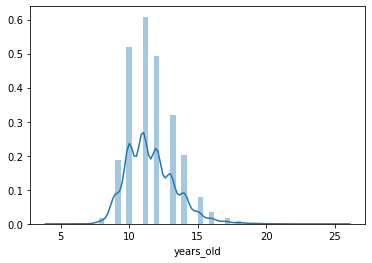

In [281]:
sns.distplot(df_train['years_old'])

In [282]:
df_train['years_old'].value_counts()

11    850
10    727
12    691
13    446
14    283
9     264
15    111
16     50
8      26
17     23
18     11
19      5
20      2
21      1
7       1
5       1
25      1
Name: years_old, dtype: int64

In [290]:
test_Data['years_old'].skew()

0.8688144387518435

In [291]:
df_train['years_old']=np.log(df_train['years_old'])
test_Data['years_old']=np.log(test_Data['years_old'])

In [312]:
cube=sc.fit_transform(df_train[['Facebook Popularity Quotient']]**3)
df_train['Facebook Popularity Quotient']=pd.DataFrame(cube)[0]

In [313]:
cube=sc.fit_transform(test_Data[['Facebook Popularity Quotient']]**3)
test_Data['Facebook Popularity Quotient']=pd.DataFrame(cube)[0]

In [366]:
df_train['opening_month'].unique()

array([ 2,  9,  7, 11,  6,  1,  5, 12,  8, 10,  3,  4], dtype=int64)

In [365]:
test_Data['opening_month'].unique()

array([ 7,  5, 12,  1, 10,  3,  4,  8,  6,  9, 11,  2], dtype=int64)

In [373]:
df_train['opening_month']=df_train['opening_month'].astype('object')
test_Data['opening_month']=test_Data['opening_month'].astype('object')

In [314]:
from sklearn.impute import KNNImputer
knnimpute=KNNImputer(n_neighbors=5)

In [334]:
cat_dummy=pd.get_dummies(df_train.select_dtypes(include='object'),drop_first=True)

num=df_train.select_dtypes(include=np.number)
X0=pd.concat([city_dummy,theme_dummy,cuisine_dummy,cat_dummy,num],axis=1)
y=target

In [335]:
X=knnimpute.fit_transform(X0)

In [336]:
cat_dummy_test=pd.get_dummies(test_Data.select_dtypes(include='object'),drop_first=True)

num_test=test_Data.select_dtypes(include=np.number)
X0_test=pd.concat([city_test_dummy,theme_dummy_test,cuisine_test_dummy,cat_dummy_test,num_test
                  ],axis=1)
test_X=knnimpute.transform(X0_test)

In [338]:
X.shape

(3493, 139)

In [337]:
test_X.shape

(500, 139)

In [124]:
X.shape

(13972, 104)

In [126]:
test_X.shape

(4993, 104)

In [130]:
target

0        42000000
1        50000000
2        32500000
3       110000000
4        20000000
          ...    
3488     40500000
3489     32500000
3490     42500000
3491     53000000
3492     12000000
Name: Annual Turnover, Length: 3493, dtype: int64

In [339]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=110)

In [340]:
from sklearn.linear_model import LinearRegression

In [341]:
lir=LinearRegression(fit_intercept=True)


lir.fit(X_train,y_train)
train_pred_lir=lir.predict(X_train)
test_pred_lir=lir.predict(X_test)
print('rmse train',np.sqrt(metrics.mean_squared_error(y_train,train_pred_lir)))
print('rmse test',np.sqrt(metrics.mean_squared_error(y_test,test_pred_lir)))

rmse train 19920119.036549952
rmse test 18755662.593057986


In [342]:
lir_cv_score=cross_val_score(lir,X_train,y_train,cv=5,scoring='r2')

In [343]:
lir_cv_predict=model_selection.cross_val_predict(lir,X_train,y_train,cv=5)

In [344]:
print('rmse train',np.sqrt(metrics.mean_squared_error(y_train,lir_cv_predict)))


rmse train 20677448.609525263


In [345]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [346]:
params={'alpha':[.001,.01,.1,1,10,100,1000]}


In [347]:
ridge=Ridge(fit_intercept=True)
grid=GridSearchCV(estimator=ridge,
                 param_grid=params,
                 cv=10,
                 scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [348]:
grid.best_estimator_

Ridge(alpha=10)

In [349]:
grid.best_score_

0.15112360416488949

In [350]:
ridge=Ridge(alpha=100,fit_intercept=True)
ridge.fit(X_train,y_train)

train_pred_ridge=ridge.predict(X_train)
test_pred_ridge=ridge.predict(X_test)
print('rmse train',np.sqrt(metrics.mean_squared_error(y_train,train_pred_ridge)))
print('rmse test',np.sqrt(metrics.mean_squared_error(y_test,test_pred_ridge)))

rmse train 20239708.128606573
rmse test 18647555.464535113


In [351]:
ridge=Ridge(fit_intercept=True)
grid=GridSearchCV(estimator=ridge,
                 param_grid=params,
                 cv=10,
                 scoring='r2')
grid.fit(X,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [352]:
grid.best_estimator_

Ridge(alpha=10)

In [353]:
ridge2=Ridge(alpha=100,fit_intercept=True)
ridge2.fit(X,y)
pred=ridge2.predict(X)

print('rmse ',np.sqrt(metrics.mean_squared_error(y,pred)))


rmse  19880498.21950984


In [354]:
lir=LinearRegression(fit_intercept=True)


lir.fit(X,y)
pred_lir=lir.predict(X)
 
print('rmse ',np.sqrt(metrics.mean_squared_error(y,pred_lir)))


rmse  19626275.38340045


In [355]:
y_test_set=lir.predict(test_X)

In [356]:
len(y_test_set)

500

In [357]:
regno=reg_no_test['Registration Number']


In [358]:
submission=pd.DataFrame(regno)
submission['Annual Turnover']=y_test_set

In [359]:
submission.set_index('Registration Number',inplace=True)

In [360]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 20001 to 20500
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual Turnover  500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [361]:
submission.to_csv('submission.csv')